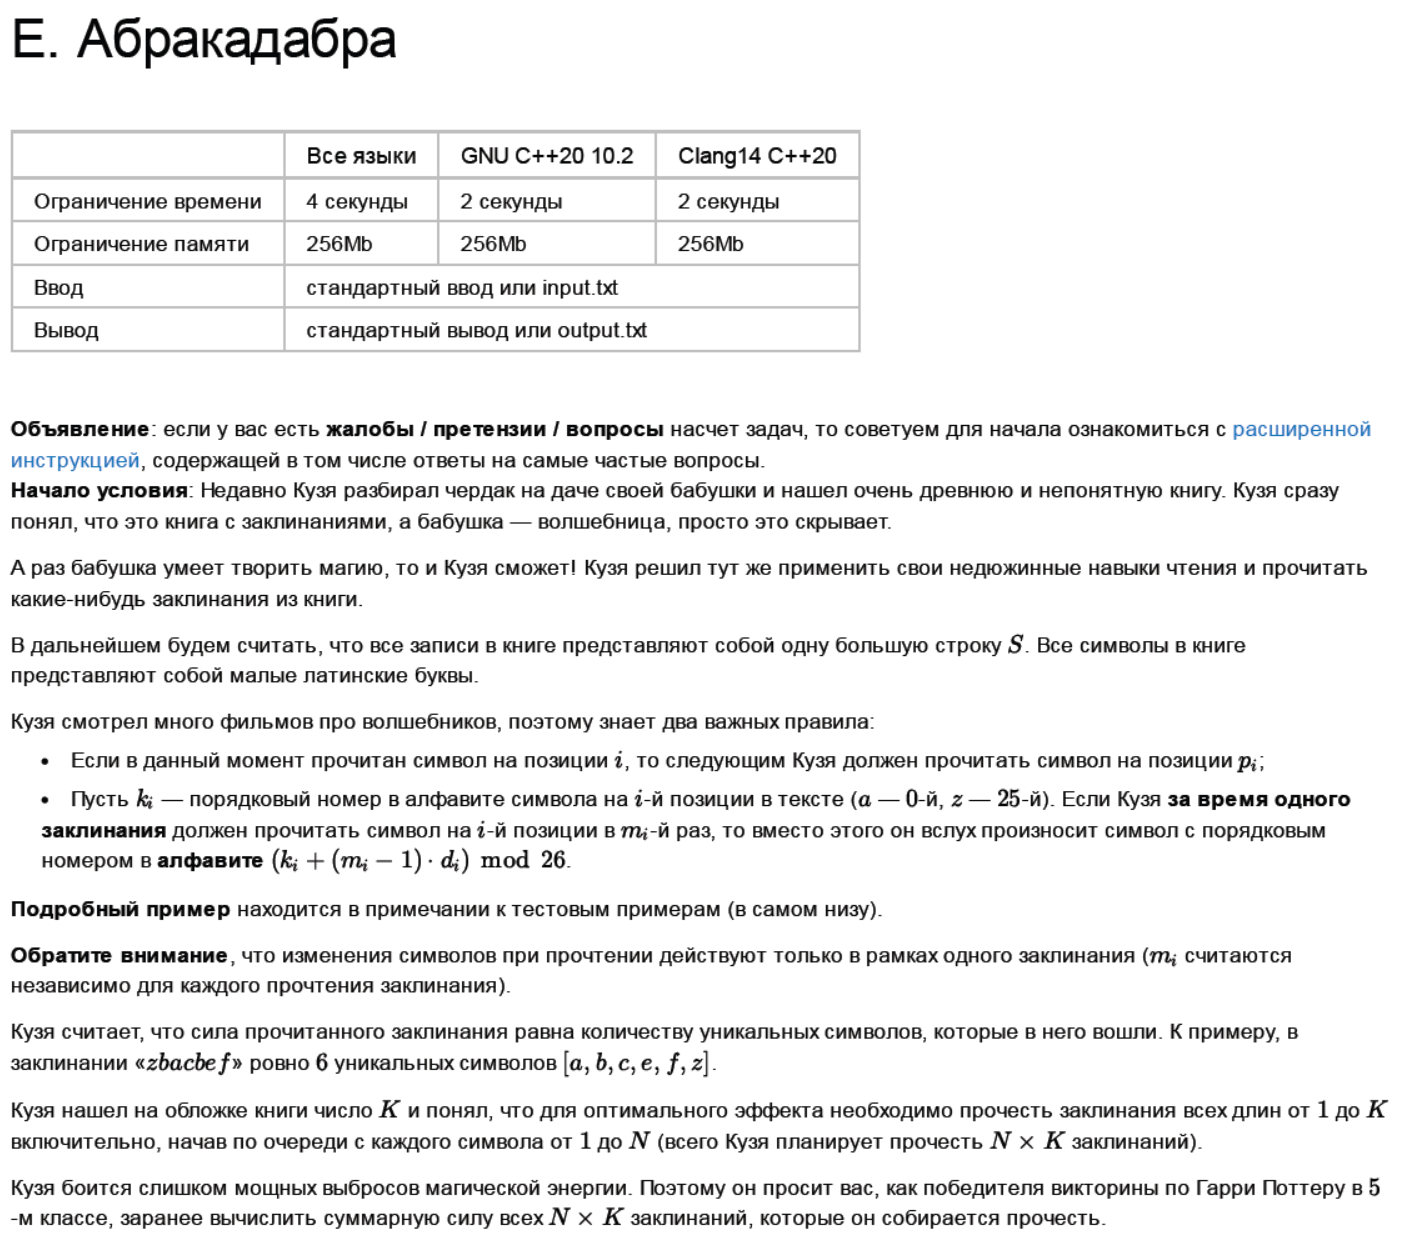

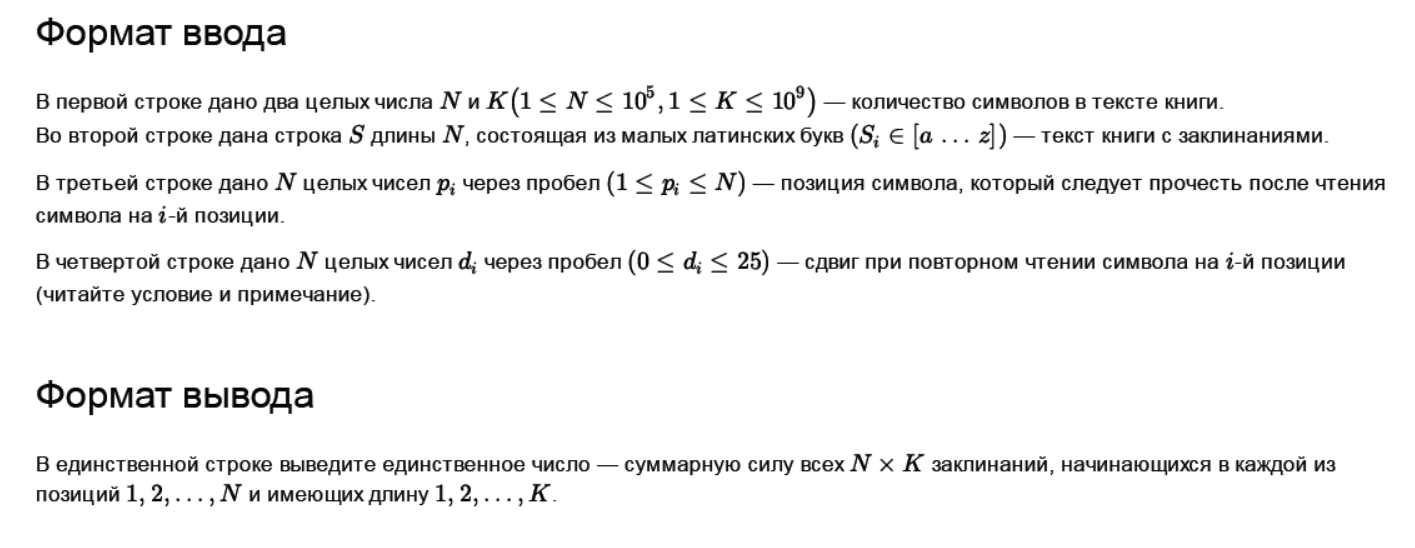

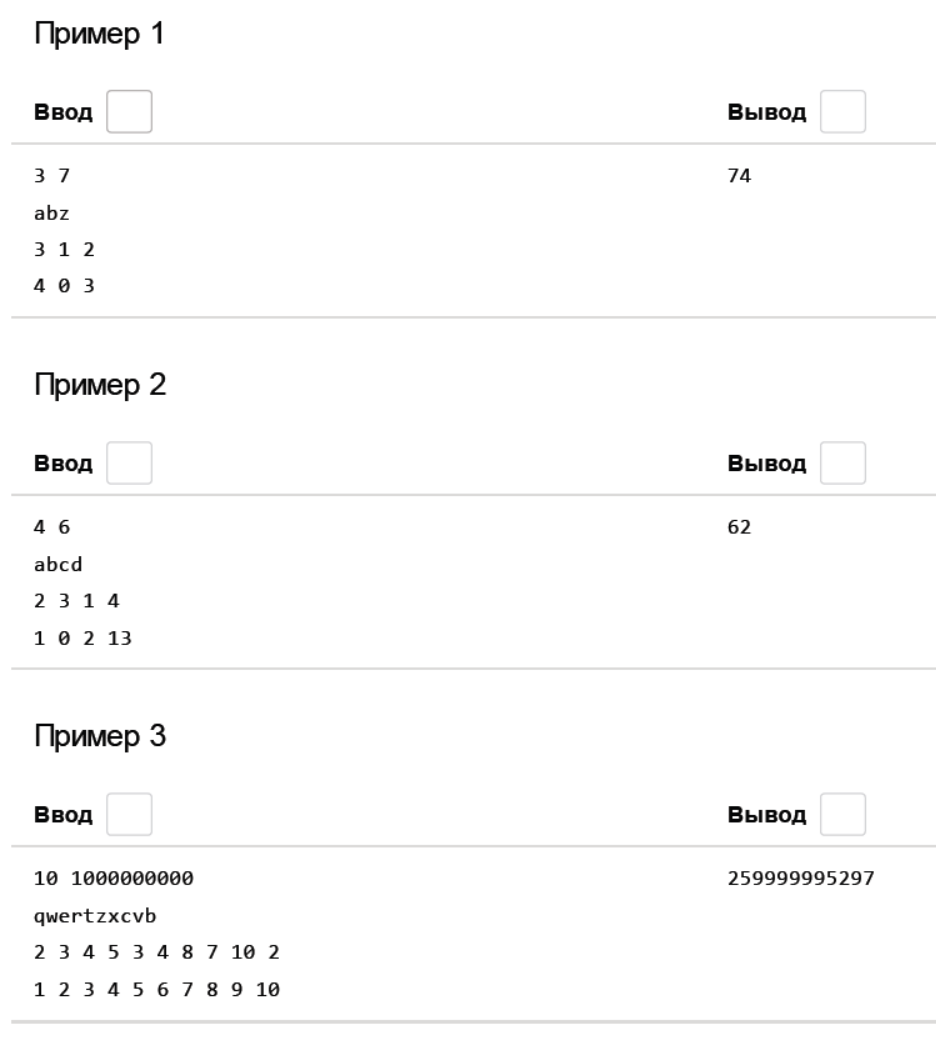

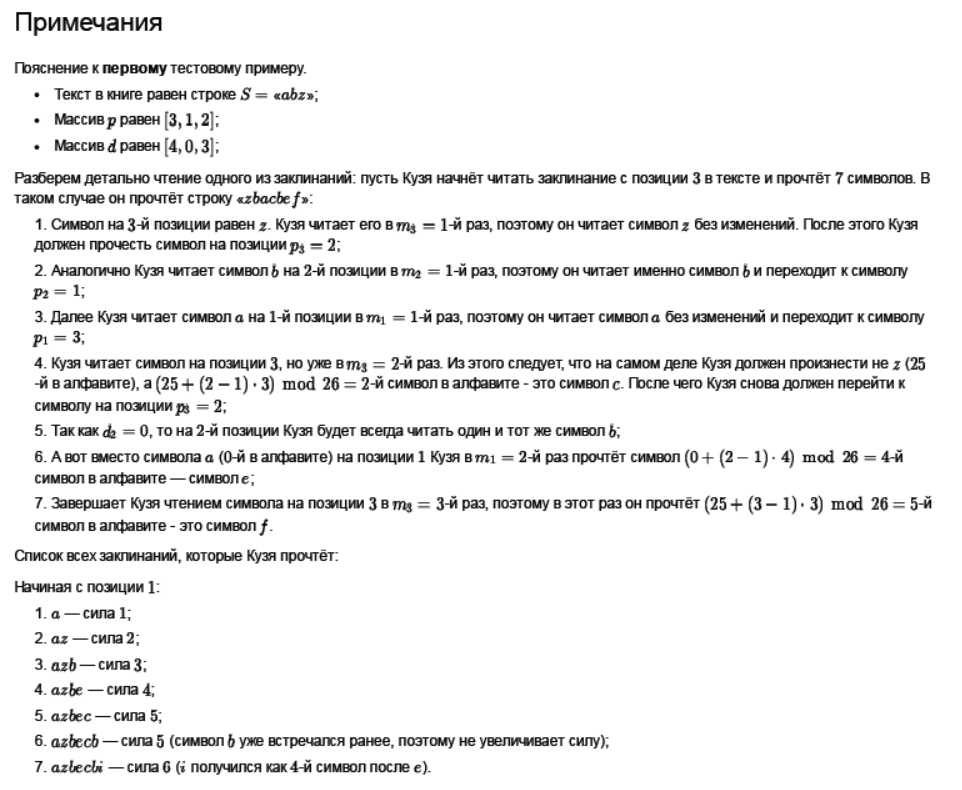

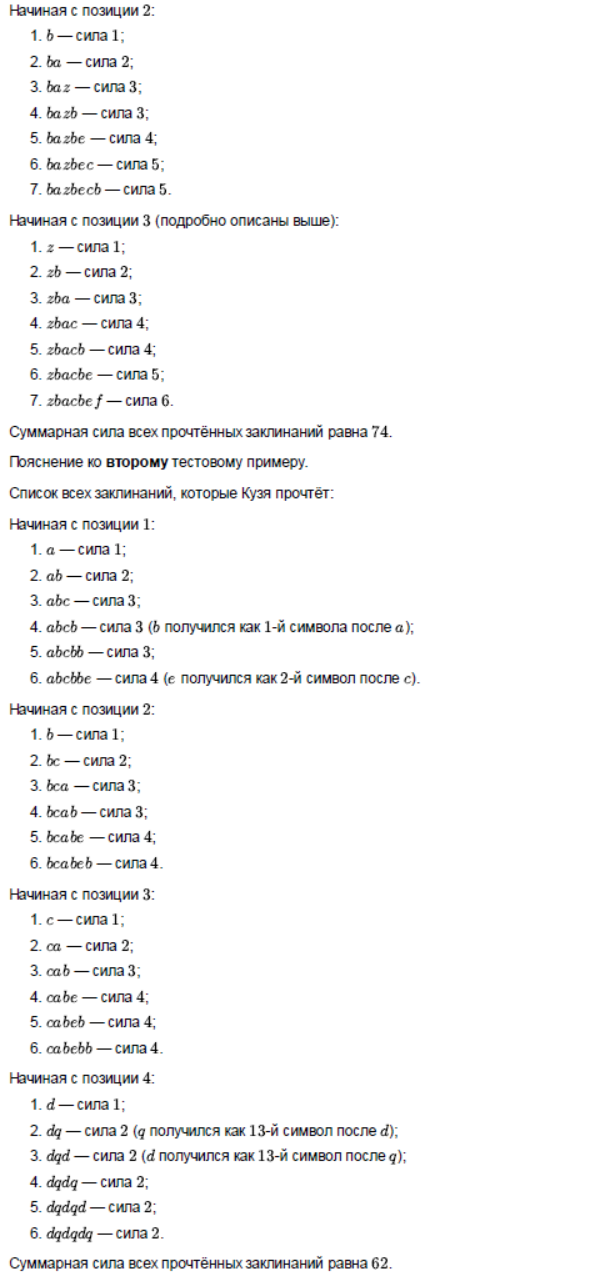

In [83]:
# import string
# from tqdm import tqdm
# Считывание входных данных для задания
with open('abracadabra_input_3.txt') as input_file:
    n, k = map(int, input_file.readline().strip().split())
    s = input_file.readline().strip()
    pi = list(map(int, input_file.readline().strip().split()))
    di = list(map(int, input_file.readline().strip().split()))

# Проверка цикла алфовита по di
# alphabet = string.ascii_lowercase
# for i in range(100000):
#     si_idx = 25
#     di = i
#     count = 0
#     while True:
#         if count > 0 and alphabet[si_idx] == alphabet[(si_idx + count*di) % 26]:
#             break
#         count+= 1
#     if count not in [1, 2, 13, 26]:
#         print('error', count)
#         print(di)


# Укажем алфавит 
alphabet = 'abcdefghijklmnopqrstuvwxyz'
used_symbols = [0] * len(alphabet) 

# Переведем di в список dj сколько можно максимум раз пройти по алфовиту без повторени
# 1 - для di == 0 т.к. повторяться может 1 раз
# 2 - для di % 13 == 0 т.к. символ повториться через 1 раз
# 13 - для di % 2 == 0 т.к. символ повториться через 13 раз
# 26 - для di % 2 != 0 т.к. символ повториться через 26 раз
dj = [1 if num == 0 else
      2 if num % 13 == 0 else
      13 if num % 2 == 0 else
      26 for num in di]

# Первратим строку в лист для замены символов в случае повторения
s_list = list(s)

# Максимальная сила каждого заклинания
spell_powers = [0] * n
for i in range(n):
    # Копирование начальных данных для каждого n заклинания
    spell_s_list = s_list.copy()
    spell_used_symbols = used_symbols.copy()

    # Определяем первый символ и его индекс в алфовите от 0 до 25
    curr_symbol = spell_s_list[i]
    curr_symbol_idx = alphabet.index(curr_symbol)

    # Сила равна 1 т.к. ранее этот символ не встречался и он 1
    power = 1

    # Отмечаем использованный символ
    spell_used_symbols[curr_symbol_idx] = 1

    # Добавляем силу заклинания к общей силе заклинаий
    spell_powers[i] += power

    # Находим следующий символ по последовательности pi
    next_symbol = pi[i] - 1


    available_length = k - 1   # Ограничиваем по длине закленания
    available_power = sum(dj)  # Уходим от петель в последовательности
    while available_power > 0 and available_length > 0:
        available_power -= 1
        available_length -= 1

        # Нахождение текущего символа и его сдвиг если он раннее использовался
        curr_symbol = spell_s_list[next_symbol]
        curr_symbol_idx = alphabet.index(curr_symbol)

        is_curr_symbol_used = spell_used_symbols[curr_symbol_idx]
        if is_curr_symbol_used == 1:
            new_symbol_idx = (curr_symbol_idx + di[next_symbol]) % 26

            curr_symbol = alphabet[new_symbol_idx]
            curr_symbol_idx = new_symbol_idx
            spell_s_list[next_symbol] = curr_symbol

        # добавляем силу за уникальность
        if not spell_used_symbols[curr_symbol_idx]:
            power += 1

        # Отмечаем использованные символы из алфовита
        spell_used_symbols[curr_symbol_idx] = 1

        # Добавляем силу заклинания к общей силе заклинаий
        spell_powers[i] += power

        # Определяем следующий индекс символа
        next_symbol = pi[next_symbol] - 1

    if k > sum(dj):
        spell_powers[i] += power * (k - sum(dj) - 1)

# print(spell_powers)
print(sum(spell_powers))


# Дошел до 4 теста и там WA

259999995297
